In [1]:
'''
【项目03】  知乎数据清洗整理和结论研究

作业要求：
1、数据清洗 - 去除空值
要求：创建函数
提示：fillna方法填充缺失数据，注意inplace参数

2、问题1 知友全国地域分布情况，分析出TOP20
要求：
① 按照地域统计 知友数量、知友密度（知友数量/城市常住人口），不要求创建函数
② 知友数量，知友密度，标准化处理，取值0-100，要求创建函数
③ 通过多系列柱状图，做图表可视化
提示：
① 标准化计算方法 = (X - Xmin) / (Xmax - Xmin)
② 可自行设置图表风格

3、问题2 知友全国地域分布情况，分析出TOP20
要求：
① 按照学校（教育经历字段） 统计粉丝数（‘关注者’）、关注人数（‘关注’），并筛选出粉丝数TOP20的学校，不要求创建函数
② 通过散点图 → 横坐标为关注人数，纵坐标为粉丝数，做图表可视化
③ 散点图中，标记出平均关注人数（x参考线），平均粉丝数（y参考线）
提示：
① 可自行设置图表风格

'''

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# 数据读取

data1 = pd.read_csv('C:/Users/Hjx/Desktop/知乎数据_201701.csv', engine = 'python')
data2 = pd.read_csv('C:/Users/Hjx/Desktop/六普常住人口数.csv', engine = 'python')
print(data1.head())
print(data2.head())

                        _id  关注的收藏夹   关注  关注者  关注的问题  关注的话题  关注的专栏   职业1  \
0  587598f89f11daf90617fb7a      52   17    1     30     58      2  交通仓储   
1  587598f89f11daf90617fb7c      27   73   15     87     26      1  高新科技   
2  587598f89f11daf90617fb7e      72   94    1    112     20      4   NaN   
3  587598f89f11daf90617fb80     174   84    8    895     30      7    金融   
4  587598f89f11daf90617fb82       3  236   64    119     44     17    金融   

    职业2    回答   提问    收藏       个人简介  居住地  所在行业                       教育经历 职业经历  
0    邮政   0.0  0.0   3.0        NaN  NaN    邮政                        NaN  NaN  
1   互联网  56.0  4.0  14.0        NaN   重庆   互联网                     重庆邮电大学  NaN  
2   NaN   1.0  0.0  21.0        NaN  NaN   NaN                        NaN  NaN  
3    财务   0.0  0.0  22.0        NaN  NaN    财务                        NaN  NaN  
4  证券投资   6.0  0.0  12.0  无求 心静 魔不生   上海  证券投资  雪城大学（Syracuse University）  NaN  
     省   地区 结尾        常住人口
0  安徽省  安徽省  省  59500468.0
1  

In [3]:
# 数据清洗 - 去除空值
# 文本型字段空值改为“缺失数据”，数字型字段空值改为 0 
# 要求：创建函数
# 提示：fillna方法填充缺失数据，注意inplace参数

def data_cleaning(df):
    cols = df.columns
    for col in cols:
        if df[col].dtype ==  'object':
            df[col].fillna('缺失数据', inplace = True)
        else:
            df[col].fillna(0, inplace = True)
    return(df)
# 该函数可以将任意数据内空值替换

data1_c = data_cleaning(data1)
data1_c.head(10)

,_id,关注的收藏夹,关注,关注者,关注的问题,关注的话题,关注的专栏,职业1,职业2,回答,提问,收藏,个人简介,居住地,所在行业,教育经历,职业经历
0,587598f89f11daf90617fb7a,52,17,1,30,58,2,交通仓储,邮政,0.0,0.0,3.0,缺失数据,缺失数据,邮政,缺失数据,缺失数据
1,587598f89f11daf90617fb7c,27,73,15,87,26,1,高新科技,互联网,56.0,4.0,14.0,缺失数据,重庆,互联网,重庆邮电大学,缺失数据
2,587598f89f11daf90617fb7e,72,94,1,112,20,4,缺失数据,缺失数据,1.0,0.0,21.0,缺失数据,缺失数据,缺失数据,缺失数据,缺失数据
3,587598f89f11daf90617fb80,174,84,8,895,30,7,金融,财务,0.0,0.0,22.0,缺失数据,缺失数据,财务,缺失数据,缺失数据
4,587598f89f11daf90617fb82,3,236,64,119,44,17,金融,证券投资,6.0,0.0,12.0,无求 心静 魔不生,上海,证券投资,雪城大学（Syracuse University）,缺失数据
5,587598f89f11daf90617fb84,15,577,46,7472,131,81,缺失数据,缺失数据,0.0,0.0,21.0,缺失数据,缺失数据,缺失数据,缺失数据,缺失数据
6,587598f89f11daf90617fb86,13,52,3,47,2,6,缺失数据,缺失数据,0.0,0.0,0.0,大王叫我来巡山。,缺失数据,缺失数据,缺失数据,缺失数据
7,587598f89f11daf90617fb88,105,104,2,55,46,13,高新科技,电子商务,0.0,0.0,0.0,缺失数据,山东,电子商务,缺失数据,缺失数据
8,587598f89f11daf90617fb8a,795,268,39,49,1,69,高新科技,互联网,0.0,0.0,0.0,缺失数据,缺失数据,互联网,缺失数据,缺失数据
9,587598f89f11daf90617fb8c,8,111,3,31,6,3,缺失数据,缺失数据,0.0,0.0,2.0,缺失数据,缺失数据,缺失数据,缺失数据,缺失数据


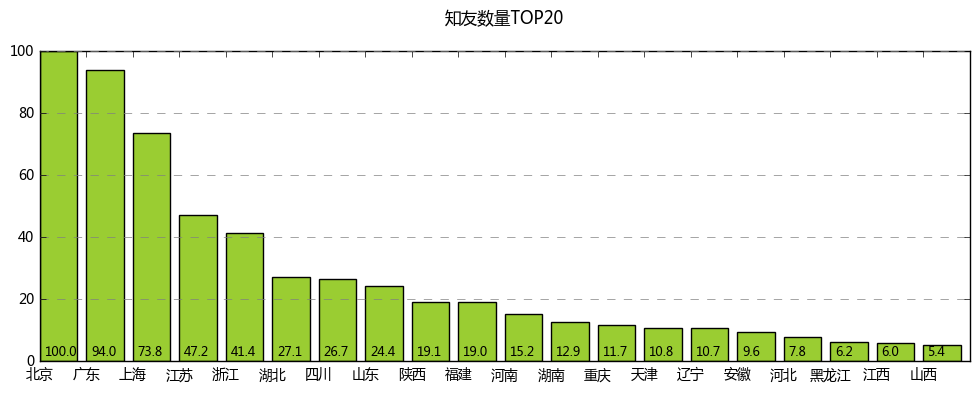

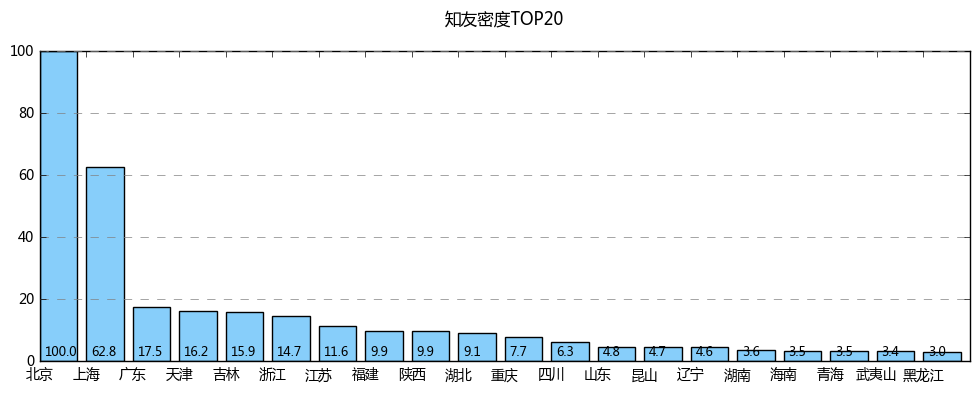

In [4]:
# 问题1 知友全国地域分布情况，分析出TOP20
# 要求：
# ① 按照地域统计 知友数量、知友密度（知友数量/城市常住人口），不要求创建函数
# ② 知友数量，知友密度，标准化处理，取值0-100，要求创建函数
# ③ 通过多系列柱状图，做图表可视化
# 提示：
# ① 标准化计算方法 = (X - Xmin) / (Xmax - Xmin)
# ② 可自行设置图表风格

df_city = data1_c.groupby('居住地').count()  # 按照居住地统计知友数量
data2['city'] = data2['地区'].str[:-1]   # 城市信息清洗，去掉城市等级文字
#print(df_city.head())  
#print(data2.head())  

q1data = pd.merge(df_city, data2, left_index = True, right_on = 'city', how = 'inner')[['_id','city','常住人口']]
q1data['知友密度'] = q1data['_id']/q1data['常住人口'] 
#print(q1data.head())
# 统计计算知友数量，知友密度

def data_nor(df, *cols):
    colnames = []
    for col in cols:
        colname = col + '_nor'
        df[colname] = (df[col]-df[col].min())/(df[col].max()-df[col].min()) * 100
        colnames.append(colname)
    return(df,colnames)
# 创建函数，结果返回标准化取值，新列列名

resultdata = data_nor(q1data,'_id','知友密度')[0]
resultcolnames = data_nor(q1data,'_id','知友密度')[1]
q1data_top20_sl = resultdata.sort_values(resultcolnames[0], ascending=False)[['city',resultcolnames[0]]].iloc[:20]
q1data_top20_md = resultdata.sort_values(resultcolnames[1], ascending=False)[['city',resultcolnames[1]]].iloc[:20]
#print(q1data_top20_md)
# 标准化取值后得到知友数量，知友密度的TOP20数据

fig1 = plt.figure(num=1,figsize=(12,4))
y1 = q1data_top20_sl[resultcolnames[0]]
plt.bar(range(20),
        y1,
        width = 0.8,
        facecolor = 'yellowgreen',
        edgecolor = 'k',
        tick_label = q1data_top20_sl['city'])
plt.title('知友数量TOP20\n')
plt.grid(True, linestyle = "--",color = "gray", linewidth = "0.5", axis = 'y')  
for i,j in zip(range(20),y1):
    plt.text(i+0.1,2,'%.1f' % j, color = 'k',fontsize = 9)

fig2 = plt.figure(num=2,figsize=(12,4))
y2 = q1data_top20_md[resultcolnames[1]]
plt.bar(range(20),
        y2,
        width = 0.8,
        facecolor = 'lightskyblue',
        edgecolor = 'k',
        tick_label = q1data_top20_md['city'])
plt.grid(True, linestyle = "--",color = "gray", linewidth = "0.5", axis = 'y')  
plt.title('知友密度TOP20\n')
for i,j in zip(range(20),y2):
    plt.text(i+0.1,2,'%.1f' % j, color = 'k',fontsize = 9)
# 创建图表

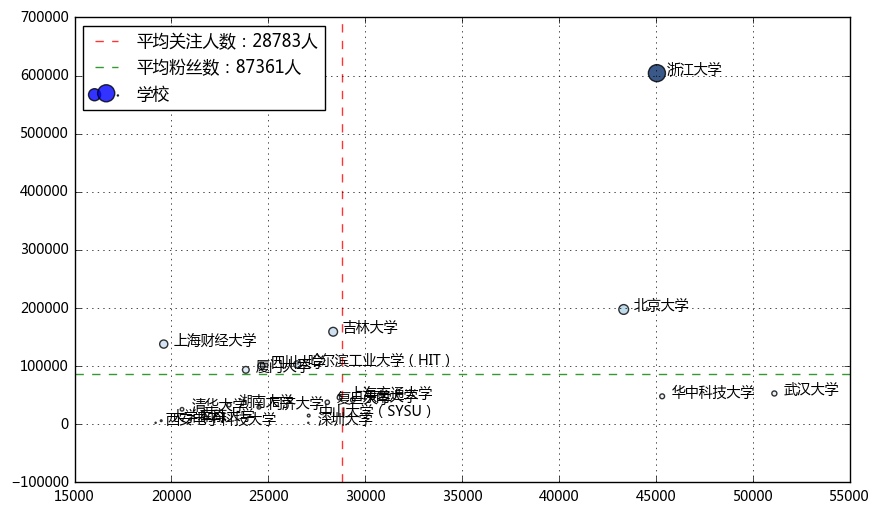

In [5]:
# 问题2 不同高校知友关注和被关注情况
# 要求：
# ① 按照学校（教育经历字段） 统计粉丝数（‘关注者’）、关注人数（‘关注’），并筛选出粉丝数TOP20的学校，不要求创建函数
# ② 通过散点图 → 横坐标为关注人数，纵坐标为粉丝数，做图表可视化
# ③ 散点图中，标记出平均关注人数（x参考线），平均粉丝数（y参考线）
# 提示：
# ① 可自行设置图表风格

q2data = data1_c.groupby('教育经历').sum()[['关注','关注者']].drop(['缺失数据','大学','本科'])
q2data_c = q2data.sort_values('关注',ascending=False)[:20]
#print(q2data_c)
# 统计计算学校的粉丝数、被关注量

plt.figure(figsize=(10,6))
x = q2data_c['关注']
y = q2data_c['关注者']
follow_mean = q2data_c['关注'].mean()
fans_mean = q2data_c['关注者'].mean()
plt.scatter(x,y,marker='.',
           s = y/1000,
           cmap = 'Blues',
           c = y,
           alpha = 0.8,
           label = '学校')
# 创建散点图

plt.axvline(follow_mean,hold=None,label="平均关注人数：%i人" % follow_mean,color='r',linestyle="--",alpha=0.8)  # 添加x轴参考线
plt.axhline(fans_mean,hold=None,label="平均粉丝数：%i人" % fans_mean,color='g',linestyle="--",alpha=0.8)   # 添加y轴参考线
plt.legend(loc = 'upper left')
plt.grid()
# 添加显示内容

for i,j,n in zip(x,y,q2data_c.index):
    plt.text(i+500,j,n, color = 'k')
# 添加注释